In [94]:
import pandas as pd # type: ignore
mnist_data = pd.read_csv(r"C:\Users\chino\OneDrive\Bureau\MNISTDigitRecognizer\mnist_dataset.csv")

In [61]:
print(mnist_data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [62]:
y_train = mnist_data.iloc[:, 0].values
x_train = mnist_data.iloc[:, 1:].values

In [63]:
from sklearn.model_selection import train_test_split # type: ignore
# Split the data into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [64]:
# Normalizing the data 
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [65]:
print(x_train.shape)

(33600, 28, 28, 1)


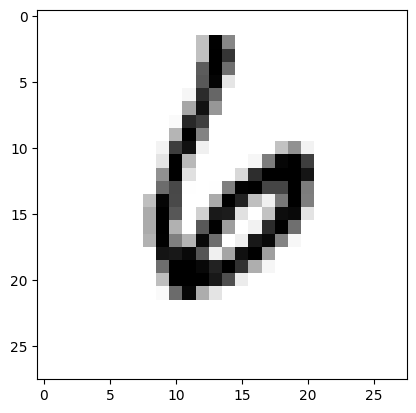

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 63]
  [253]
  [121]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 63]
  [254]
  [202]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [66]:
import matplotlib.pyplot as plt  # type: ignore
plt.imshow(x_train[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print(x_train[0])

In [67]:
#Build the model (CNN model)
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # type: ignore

model = Sequential([
    Conv2D(32, kernel_size =(3,3), activation ='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\chino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
model.save('my_model.keras')
model = tf.keras.models.load_model('my_model.keras') # type: ignore

In [88]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
#Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9968 - loss: 0.0151 - val_accuracy: 0.9861 - val_loss: 0.1289
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9977 - loss: 0.0139 - val_accuracy: 0.9833 - val_loss: 0.1740
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9969 - loss: 0.0190 - val_accuracy: 0.9857 - val_loss: 0.1469
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9972 - loss: 0.0157 - val_accuracy: 0.9856 - val_loss: 0.1169
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9978 - loss: 0.0098 - val_accuracy: 0.9844 - val_loss: 0.1509
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9967 - loss: 0.0164 - val_accuracy: 0.9875 - val_loss: 0.1192
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9982 - loss: 0.0106 - val_accuracy: 0.9833 - val_loss: 0.1659
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9977 - loss: 0.0090 -

In [90]:
# Evaluate the model
val_loss, val_acc = model.evaluate(x_test, y_test)

print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9845 - loss: 0.1782
Validation Loss: 0.1649
Validation Accuracy: 0.9860


In [91]:
# Make predictions on the validation set
predictions = model.predict(x_test)


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [92]:
import numpy as np # type: ignore
print(np.argmax(predictions[0]))

8


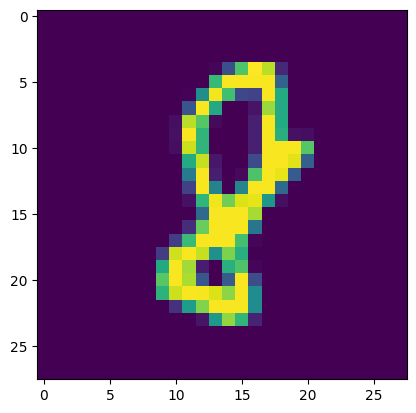

In [93]:
plt.imshow(x_test[0])
plt.show()